In [1]:
%matplotlib notebook

from sdss import SDSS
import mikkel_tools.utility as mt_util

import numpy as np
from math import inf
from scipy.optimize import curve_fit
import scipy as sp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import time
import pyshtools
import pickle

comment = "Synthetic core with tapered ensemble as prior"
nb_name = "nb_case_core_synthetic"

In [2]:
shc_g = 30
shc_grid = 30

core = SDSS(comment, N_SH = shc_g, sim_type = "core_ens", sat_height = 350)

core.grid_glq(nmax = shc_grid, r_at = core.r_cmb)

grid_in = np.array([core.grid_phi, 90-core.grid_theta]).T
core.make_grid(core.r_cmb, grid_in, calc_sph_d = False)
core.generate_map()

core.condtab(normsize=10000, quantiles = 1000, 
             rangn_lim = 3.5, rangn_N = 501, rangv_lim = 2.0, rangv_N = 101, model_hist = "ensemble") #model_hist = "ensemble"

# Covariance model

All eigenvalues > 0: True
Cov model is pos def: True


<IPython.core.display.Javascript object>


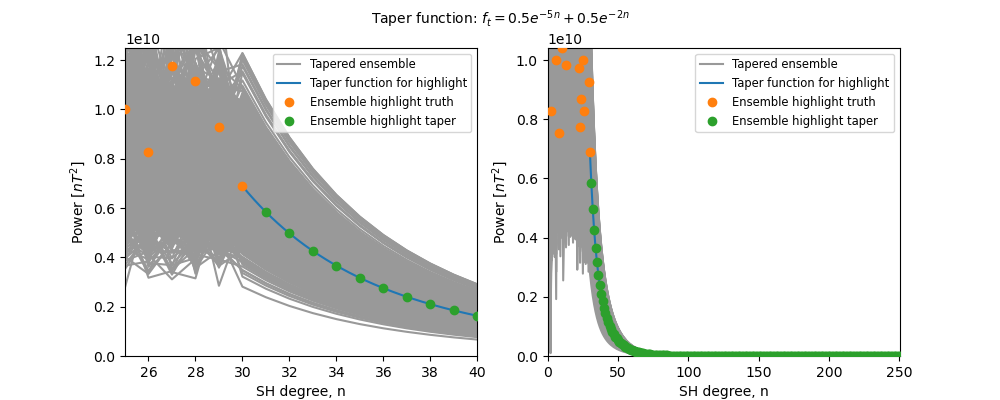

In [3]:
core.cov_model_taper(r_at = core.r_cmb, tap_to = 500, tap_exp_p1 = 5, tap_exp_p2 = 2,
                     tap_scale_start = 0, tap_scale_end = 24, plot_taper = True,
                     save_fig = False, save_string = "case_core_synthetic", save_dpi = 300)

# Source truth

In [4]:
s_source = SDSS(comment, N_SH = shc_g, sim_type = "core", sat_height = 350, N_SH_secondary = None)

s_source.grid_glq(nmax = shc_grid, r_at = core.r_cmb)

grid_in = np.array([s_source.grid_phi, 90-s_source.grid_theta]).T
s_source.make_grid(s_source.r_cmb, grid_in, calc_sph_d = False)

s_source.generate_map()

In [5]:
print(s_source)


______current attributes______

a:                6371.2
r_sat:            6721.2
r_cmb:            3480.0
rad:              0.017453292519943295
mu0:              1.2566370614359173e-06
comment:          Synthetic core with tapered ensemble as prior
class_abs_path:   /home/mikotz/spherical_direct_sequential_simulation
N_SH:             30
N_SH_secondary:   None
sim_type:         core
grid_zero:        (31,), Max/Min: 1.00 / -1.00
grid_w_shtools:   (31,), Max/Min: 0.10 / 0.01
grid_shape:       (2,), Max/Min: 61.00 / 31.00
grid_w:           (1891,), Max/Min: 0.10 / 0.01
grid_radial:      (1891,), Max/Min: 3480.00 / 3480.00
grid_theta:       (1891,), Max/Min: 175.63 / 4.37
grid_phi:         (1891,), Max/Min: 354.10 / 0.00
grid_N:           1891
grid_nmax:        30
r_grid:           3480.0
grid:             (1891, 2)
sph_d:            None
lon:              (1891,), Max/Min: 354.10 / 0.00
lat:              (1891,), Max/Min: 85.63 / -85.63
N_grid:           1891
data:             (1891,)

# Synthetic direct observations

In [6]:
C_e_const = 2.0
observations_direct_loc = np.random.choice(np.arange(s_source.grid_N),size=512,replace=False)
observations_direct = s_source.data[observations_direct_loc] + np.random.normal(loc=0.0,scale=C_e_const,size=observations_direct_loc.shape)


In [7]:
print(observations_direct_loc)

[ 192  720 1201  642  959 1366  284 1525 1594  106 1384 1206 1198 1873
  682  457  790  362 1488  178  464 1453  276 1738 1332   69  838  994
 1878  196   95  392 1301  755 1666  977  465  742  146 1559   74 1328
  981 1254 1374  806  889 1536  530  604  688 1187  125 1044 1008  850
 1337  797 1164 1709 1584  181 1025 1303 1404 1855 1124  432 1329  262
 1638  121  444 1583  105  195 1114 1094 1522 1643  553 1654 1158 1165
  120 1512 1732   64 1724  503 1560  151  983 1046  601  427   36  664
 1298  853 1478 1780  287 1432  177  268 1400  109 1267   86 1330  671
  116  599   66  564  170 1672  897 1381 1437 1735  779 1097  823  114
  690    8 1340 1031  693 1822  656  230  691  389  789  904 1748 1521
  782 1853 1252 1564 1727 1872  506 1071 1762  774  951  937 1290  317
  266  398 1543 1173 1831  591  305 1618  555   94  368  623  841  459
 1390  605   88 1550 1119  561    4 1484 1818  366  335  343  965  881
 1567  666 1334  836 1850 1283  770  638  253  978 1614 1705 1482 1226
  887 

# System equations

In [8]:
#core.integrating_kernel(s_sat, C_e_const = C_e_const, C_mm_supply = core.C_ens_tap)
#core.integrating_kernel(None, C_e_const = C_e_const, C_mm_supply = core.C_ens_tap)

core.C_ens_tap[observations_direct_loc,observations_direct_loc] += C_e_const

In [9]:
print(core)


______current attributes______

a:                  6371.2
r_sat:              6721.2
r_cmb:              3480.0
rad:                0.017453292519943295
mu0:                1.2566370614359173e-06
comment:            Synthetic core with tapered ensemble as prior
class_abs_path:     /home/mikotz/spherical_direct_sequential_simulation
N_SH:               30
N_SH_secondary:     None
sim_type:           core_ens
grid_zero:          (31,), Max/Min: 1.00 / -1.00
grid_w_shtools:     (31,), Max/Min: 0.10 / 0.01
grid_shape:         (2,), Max/Min: 61.00 / 31.00
grid_w:             (1891,), Max/Min: 0.10 / 0.01
grid_radial:        (1891,), Max/Min: 3480.00 / 3480.00
grid_theta:         (1891,), Max/Min: 175.63 / 4.37
grid_phi:           (1891,), Max/Min: 354.10 / 0.00
grid_N:             1891
grid_nmax:          30
r_grid:             3480.0
grid:               (1891, 2)
sph_d:              None
lon:                (1891,), Max/Min: 354.10 / 0.00
lat:                (1891,), Max/Min: 85.63 / -85

# SDSSIM

In [10]:
N_sim = 1000
core.target_var = np.max(core.C_ens_tap) #+ C_e_const

#core.run_sim(N_sim, core.grid_N, core.C_mm_all, core.C_dd, core.C_dm_all, core.G,
#        s_sat.data, core.data, scale_m_i = True, unit_d = False, collect_all = True,
#        sense_running_error = True, save_string = nb_name, sim_stochastic = False, solve_cho = True)

core.run_sim(N_sim, core.grid_N, core.C_ens_tap, None, None, None,
        None, core.data, 
        observations_direct = observations_direct, observations_direct_loc = observations_direct_loc, 
        observations_direct_e = C_e_const, use_sgs = False,
        scale_m_i = True, unit_d = False, collect_all = True,
        sense_running_error = True, save_string = nb_name, sim_stochastic = False, solve_cho = True)

 |OOOOOOOOOO| 100.0%   realization nr. 0. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.423 seconds 
Total elapsed time: 0.674 minutes 
Variance: 295888748478.186
Mean: -13557.422
Max: 1993072.415
Min: -2035918.001
Run nr.: 1

 |OOOOOOOOOO| 100.0%   realization nr. 1. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.313 seconds 
Total elapsed time: 1.346 minutes 
Variance: 315999929056.085
Mean: -7844.929
Max: 2423290.381
Min: -1733071.668
Run nr.: 2

 |OOOOOOOOOO| 100.0%   realization nr. 2. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.284 seconds 
Total elapsed time: 2.017 minutes 
Variance: 289492789001.797
Mean: -5524.179
Max: 4903478.066
Min: -1797755.596
Run nr.: 3

 |OOOOOOOOOO| 100.0%   realization nr. 3. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.432 seconds 
Total elapsed time: 2.691 minutes 
Variance: 289198648251.976
Mean: -8965.392
Max: 2302603.995
Min: -1764113.914
Run nr.: 4

 |OOOOOOOOOO| 100.0%   realizat

 |OOOOOOOOOO| 100.0%   realization nr. 34. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.330 seconds 
Total elapsed time: 23.518 minutes 
Variance: 284889549499.366
Mean: -7585.690
Max: 1721486.332
Min: -1561590.153
Run nr.: 35

 |OOOOOOOOOO| 100.0%   realization nr. 35. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.301 seconds 
Total elapsed time: 24.190 minutes 
Variance: 272360496120.370
Mean: -9084.380
Max: 1708992.157
Min: -1548998.397
Run nr.: 36

 |OOOOOOOOOO| 100.0%   realization nr. 36. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.312 seconds 
Total elapsed time: 24.862 minutes 
Variance: 284118112325.125
Mean: -10855.779
Max: 1981191.007
Min: -1753513.233
Run nr.: 37

 |OOOOOOOOOO| 100.0%   realization nr. 37. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.338 seconds 
Total elapsed time: 25.534 minutes 
Variance: 298587907786.197
Mean: -14145.418
Max: 1567708.968
Min: -4875739.344
Run nr.: 38

 |OOOOOOOOOO| 100.

 |OOOOOOOOOO| 100.0%   realization nr. 67. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.227 seconds 
Total elapsed time: 45.681 minutes 
Variance: 295243114556.787
Mean: -6087.891
Max: 2362246.093
Min: -2080468.491
Run nr.: 68

 |OOOOOOOOOO| 100.0%   realization nr. 68. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.120 seconds 
Total elapsed time: 46.350 minutes 
Variance: 301316679727.752
Mean: -5540.619
Max: 2149926.813
Min: -1891643.857
Run nr.: 69

 |OOOOOOOOOO| 100.0%   realization nr. 69. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.197 seconds 
Total elapsed time: 47.020 minutes 
Variance: 291594010985.573
Mean: -13566.555
Max: 1928778.895
Min: -1713718.900
Run nr.: 70

 |OOOOOOOOOO| 100.0%   realization nr. 70. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.250 seconds 
Total elapsed time: 47.691 minutes 
Variance: 280866100254.064
Mean: -10077.688
Max: 2036387.075
Min: -1590244.604
Run nr.: 71

 |OOOOOOOOOO| 100.

 |OOOOOOOOOO| 100.0%   realization nr. 101. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.155 seconds 
Total elapsed time: 1.142 hours 
Variance: 297275083991.716
Mean: -9128.570
Max: 1887573.200
Min: -1670756.436
Run nr.: 102

 |OOOOOOOOOO| 100.0%   realization nr. 102. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.188 seconds 
Total elapsed time: 1.153 hours 
Variance: 287729224099.614
Mean: -8451.161
Max: 2745382.030
Min: -1699390.479
Run nr.: 103

 |OOOOOOOOOO| 100.0%   realization nr. 103. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.137 seconds 
Total elapsed time: 1.164 hours 
Variance: 281556095994.116
Mean: -8282.198
Max: 1864325.450
Min: -1411880.589
Run nr.: 104

 |OOOOOOOOOO| 100.0%   realization nr. 104. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.301 seconds 
Total elapsed time: 1.175 hours 
Variance: 281129319786.141
Mean: -10475.061
Max: 1548946.597
Min: -1562823.131
Run nr.: 105

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 135. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 37.787 seconds 
Total elapsed time: 1.479 hours 
Variance: 291402537101.371
Mean: -9191.507
Max: 2066128.903
Min: -1977602.116
Run nr.: 136

 |OOOOOOOOOO| 100.0%   realization nr. 136. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 37.796 seconds 
Total elapsed time: 1.489 hours 
Variance: 299937080203.565
Mean: -14194.989
Max: 1688826.342
Min: -1948654.692
Run nr.: 137

 |OOOOOOOOOO| 100.0%   realization nr. 137. Counter: 1891/1891, Running error magnitude: 3.9
Run time: 37.785 seconds 
Total elapsed time: 1.500 hours 
Variance: 257340695489.627
Mean: -13462.501
Max: 1856269.223
Min: -1557396.872
Run nr.: 138

 |OOOOOOOOOO| 100.0%   realization nr. 138. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 37.745 seconds 
Total elapsed time: 1.510 hours 
Variance: 286008303884.381
Mean: -11578.664
Max: 1750420.579
Min: -1794691.470
Run nr.: 139

 |OOOOOOOOOO| 100.0% 

 |OOOOOOOOOO| 100.0%   realization nr. 169. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 37.621 seconds 
Total elapsed time: 1.835 hours 
Variance: 297680066018.914
Mean: -656.667
Max: 2359781.890
Min: -1806715.160
Run nr.: 170

 |OOOOOOOOOO| 100.0%   realization nr. 170. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 38.849 seconds 
Total elapsed time: 1.845 hours 
Variance: 304889725472.341
Mean: -14911.931
Max: 2049742.895
Min: -1714762.934
Run nr.: 171

 |OOOOOOOOOO| 100.0%   realization nr. 171. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 38.955 seconds 
Total elapsed time: 1.856 hours 
Variance: 277962683549.963
Mean: -17415.486
Max: 1888857.776
Min: -1676031.670
Run nr.: 172

 |OOOOOOOOOO| 100.0%   realization nr. 172. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 39.051 seconds 
Total elapsed time: 1.867 hours 
Variance: 296186442927.202
Mean: -5399.284
Max: 2496484.051
Min: -1473610.787
Run nr.: 173

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 203. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 39.435 seconds 
Total elapsed time: 2.204 hours 
Variance: 310730045396.518
Mean: -11630.202
Max: 2214425.826
Min: -1764541.100
Run nr.: 204

 |OOOOOOOOOO| 100.0%   realization nr. 204. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 39.441 seconds 
Total elapsed time: 2.215 hours 
Variance: 294156262871.794
Mean: -7224.333
Max: 4853998.498
Min: -1654537.356
Run nr.: 205

 |OOOOOOOOOO| 100.0%   realization nr. 205. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 39.397 seconds 
Total elapsed time: 2.226 hours 
Variance: 305113994591.967
Mean: -11912.714
Max: 3041095.350
Min: -1592070.583
Run nr.: 206

 |OOOOOOOOOO| 100.0%   realization nr. 206. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 39.263 seconds 
Total elapsed time: 2.237 hours 
Variance: 308865538768.923
Mean: -11496.021
Max: 2620352.216
Min: -1612677.073
Run nr.: 207

 |OOOOOOOOOO| 100.0% 

 |OOOOOOOOOO| 100.0%   realization nr. 237. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 39.610 seconds 
Total elapsed time: 2.578 hours 
Variance: 318795406582.081
Mean: -5094.446
Max: 2222076.153
Min: -1719430.873
Run nr.: 238

 |OOOOOOOOOO| 100.0%   realization nr. 238. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 39.598 seconds 
Total elapsed time: 2.589 hours 
Variance: 305891098161.503
Mean: -10362.165
Max: 2135831.267
Min: -2128116.722
Run nr.: 239

 |OOOOOOOOOO| 100.0%   realization nr. 239. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 39.521 seconds 
Total elapsed time: 2.600 hours 
Variance: 334234117565.079
Mean: -7671.240
Max: 2369359.889
Min: -4854497.175
Run nr.: 240

 |OOOOOOOOOO| 100.0%   realization nr. 240. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 39.611 seconds 
Total elapsed time: 2.611 hours 
Variance: 317026182706.332
Mean: -4038.117
Max: 3181441.209
Min: -1920580.098
Run nr.: 241

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 271. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 39.804 seconds 
Total elapsed time: 2.953 hours 
Variance: 308015270417.871
Mean: -4477.180
Max: 2702945.482
Min: -4830952.919
Run nr.: 272

 |OOOOOOOOOO| 100.0%   realization nr. 272. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 39.781 seconds 
Total elapsed time: 2.964 hours 
Variance: 274304039503.409
Mean: -9706.311
Max: 1914345.909
Min: -1592695.046
Run nr.: 273

 |OOOOOOOOOO| 100.0%   realization nr. 273. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.019 seconds 
Total elapsed time: 2.975 hours 
Variance: 319623344813.791
Mean: -3292.317
Max: 2313316.184
Min: -2267348.665
Run nr.: 274

 |OOOOOOOOOO| 100.0%   realization nr. 274. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 39.965 seconds 
Total elapsed time: 2.986 hours 
Variance: 293385893703.228
Mean: -10792.275
Max: 2085985.749
Min: -2093234.323
Run nr.: 275

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 305. Counter: 1891/1891, Running error magnitude: 3.9
Run time: 40.016 seconds 
Total elapsed time: 3.331 hours 
Variance: 282244664551.473
Mean: -4696.127
Max: 1915701.269
Min: -1749398.207
Run nr.: 306

 |OOOOOOOOOO| 100.0%   realization nr. 306. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 40.239 seconds 
Total elapsed time: 3.342 hours 
Variance: 261796092249.717
Mean: -5688.988
Max: 2295135.143
Min: -1623641.405
Run nr.: 307

 |OOOOOOOOOO| 100.0%   realization nr. 307. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.223 seconds 
Total elapsed time: 3.353 hours 
Variance: 331072481339.012
Mean: -11712.426
Max: 2077702.887
Min: -1896088.207
Run nr.: 308

 |OOOOOOOOOO| 100.0%   realization nr. 308. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.902 seconds 
Total elapsed time: 3.365 hours 
Variance: 294030002062.726
Mean: -9315.164
Max: 2483146.853
Min: -1784455.002
Run nr.: 309

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 339. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.884 seconds 
Total elapsed time: 3.726 hours 
Variance: 313850023476.426
Mean: -10159.285
Max: 2877749.392
Min: -1548592.966
Run nr.: 340

 |OOOOOOOOOO| 100.0%   realization nr. 340. Counter: 1891/1891, Running error magnitude: 3.9
Run time: 41.901 seconds 
Total elapsed time: 3.737 hours 
Variance: 283888828460.316
Mean: -9915.617
Max: 1589171.023
Min: -1541339.765
Run nr.: 341

 |OOOOOOOOOO| 100.0%   realization nr. 341. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.897 seconds 
Total elapsed time: 3.749 hours 
Variance: 339504005486.329
Mean: -10858.908
Max: 4479581.183
Min: -2182533.514
Run nr.: 342

 |OOOOOOOOOO| 100.0%   realization nr. 342. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.953 seconds 
Total elapsed time: 3.761 hours 
Variance: 291541872669.233
Mean: -14376.861
Max: 1730186.283
Min: -3806356.954
Run nr.: 343

 |OOOOOOOOOO| 100.0% 

 |OOOOOOOOOO| 100.0%   realization nr. 373. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.917 seconds 
Total elapsed time: 4.122 hours 
Variance: 286265043009.507
Mean: -12572.657
Max: 2041968.293
Min: -1617156.575
Run nr.: 374

 |OOOOOOOOOO| 100.0%   realization nr. 374. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.737 seconds 
Total elapsed time: 4.133 hours 
Variance: 279747800137.249
Mean: -16060.980
Max: 1884529.656
Min: -1709481.679
Run nr.: 375

 |OOOOOOOOOO| 100.0%   realization nr. 375. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.897 seconds 
Total elapsed time: 4.145 hours 
Variance: 293100505938.306
Mean: -9851.000
Max: 1801560.555
Min: -1623561.688
Run nr.: 376

 |OOOOOOOOOO| 100.0%   realization nr. 376. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.055 seconds 
Total elapsed time: 4.157 hours 
Variance: 288226419134.713
Mean: -6398.082
Max: 1978993.529
Min: -2018260.645
Run nr.: 377

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 407. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.424 seconds 
Total elapsed time: 4.514 hours 
Variance: 289809978911.729
Mean: -6433.915
Max: 2372282.180
Min: -1709793.943
Run nr.: 408

 |OOOOOOOOOO| 100.0%   realization nr. 408. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.408 seconds 
Total elapsed time: 4.526 hours 
Variance: 300248743689.001
Mean: -13351.566
Max: 2623415.487
Min: -1937357.751
Run nr.: 409

 |OOOOOOOOOO| 100.0%   realization nr. 409. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.488 seconds 
Total elapsed time: 4.537 hours 
Variance: 302171454226.939
Mean: -5110.768
Max: 2751028.592
Min: -1660193.484
Run nr.: 410

 |OOOOOOOOOO| 100.0%   realization nr. 410. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.285 seconds 
Total elapsed time: 4.549 hours 
Variance: 283782753443.733
Mean: -7339.111
Max: 2226792.485
Min: -1810344.528
Run nr.: 411

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 441. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.043 seconds 
Total elapsed time: 4.906 hours 
Variance: 299434124790.591
Mean: -17255.031
Max: 1765734.509
Min: -2067471.376
Run nr.: 442

 |OOOOOOOOOO| 100.0%   realization nr. 442. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.139 seconds 
Total elapsed time: 4.918 hours 
Variance: 280223071304.741
Mean: -7190.062
Max: 1897468.609
Min: -1605067.349
Run nr.: 443

 |OOOOOOOOOO| 100.0%   realization nr. 443. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.069 seconds 
Total elapsed time: 4.930 hours 
Variance: 303225047759.022
Mean: -4575.051
Max: 2046443.790
Min: -1627810.436
Run nr.: 444

 |OOOOOOOOOO| 100.0%   realization nr. 444. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.107 seconds 
Total elapsed time: 4.941 hours 
Variance: 311354993480.121
Mean: -12163.690
Max: 1852207.739
Min: -1916257.589
Run nr.: 445

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 475. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.128 seconds 
Total elapsed time: 5.304 hours 
Variance: 320133442170.254
Mean: -11157.135
Max: 2078658.683
Min: -1971208.662
Run nr.: 476

 |OOOOOOOOOO| 100.0%   realization nr. 476. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.975 seconds 
Total elapsed time: 5.315 hours 
Variance: 301465264888.311
Mean: -9073.577
Max: 1727339.882
Min: -4799644.660
Run nr.: 477

 |OOOOOOOOOO| 100.0%   realization nr. 477. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.988 seconds 
Total elapsed time: 5.327 hours 
Variance: 297083358927.079
Mean: -18721.967
Max: 2427221.732
Min: -1583798.843
Run nr.: 478

 |OOOOOOOOOO| 100.0%   realization nr. 478. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.961 seconds 
Total elapsed time: 5.339 hours 
Variance: 317397051247.813
Mean: -8689.240
Max: 2499021.088
Min: -2178492.544
Run nr.: 479

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 509. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.201 seconds 
Total elapsed time: 5.701 hours 
Variance: 283194798455.135
Mean: -15953.724
Max: 1685155.508
Min: -1546986.388
Run nr.: 510

 |OOOOOOOOOO| 100.0%   realization nr. 510. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.036 seconds 
Total elapsed time: 5.713 hours 
Variance: 288444001622.132
Mean: -9876.950
Max: 2226299.589
Min: -1689008.456
Run nr.: 511

 |OOOOOOOOOO| 100.0%   realization nr. 511. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.160 seconds 
Total elapsed time: 5.725 hours 
Variance: 312384656982.954
Mean: -10173.737
Max: 1903521.216
Min: -2119881.912
Run nr.: 512

 |OOOOOOOOOO| 100.0%   realization nr. 512. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.785 seconds 
Total elapsed time: 5.736 hours 
Variance: 286765826449.217
Mean: -15093.027
Max: 2441095.937
Min: -1782866.757
Run nr.: 513

 |OOOOOOOOOO| 100.0% 

 |OOOOOOOOOO| 100.0%   realization nr. 543. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.767 seconds 
Total elapsed time: 6.105 hours 
Variance: 290758915304.019
Mean: -8039.057
Max: 2041493.695
Min: -2026308.417
Run nr.: 544

 |OOOOOOOOOO| 100.0%   realization nr. 544. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.842 seconds 
Total elapsed time: 6.116 hours 
Variance: 322814630909.277
Mean: -10293.710
Max: 2013563.742
Min: -2465091.164
Run nr.: 545

 |OOOOOOOOOO| 100.0%   realization nr. 545. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.719 seconds 
Total elapsed time: 6.128 hours 
Variance: 269586359771.268
Mean: -3847.018
Max: 1641158.043
Min: -1568851.832
Run nr.: 546

 |OOOOOOOOOO| 100.0%   realization nr. 546. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.643 seconds 
Total elapsed time: 6.140 hours 
Variance: 290178378768.975
Mean: -13283.473
Max: 1784543.266
Min: -1858880.471
Run nr.: 547

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 577. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.854 seconds 
Total elapsed time: 6.502 hours 
Variance: 333155773656.852
Mean: -10294.853
Max: 4897295.671
Min: -1818972.123
Run nr.: 578

 |OOOOOOOOOO| 100.0%   realization nr. 578. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.221 seconds 
Total elapsed time: 6.514 hours 
Variance: 313914402730.299
Mean: -7649.173
Max: 1855929.480
Min: -1972914.344
Run nr.: 579

 |OOOOOOOOOO| 100.0%   realization nr. 579. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.738 seconds 
Total elapsed time: 6.525 hours 
Variance: 289468979377.766
Mean: -12365.243
Max: 2196606.556
Min: -1901864.390
Run nr.: 580

 |OOOOOOOOOO| 100.0%   realization nr. 580. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.746 seconds 
Total elapsed time: 6.537 hours 
Variance: 291036048767.549
Mean: -8665.845
Max: 1885337.831
Min: -1629766.088
Run nr.: 581

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 611. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.763 seconds 
Total elapsed time: 6.897 hours 
Variance: 278983167458.879
Mean: -9805.785
Max: 2366028.824
Min: -1684223.804
Run nr.: 612

 |OOOOOOOOOO| 100.0%   realization nr. 612. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.904 seconds 
Total elapsed time: 6.909 hours 
Variance: 304584363646.921
Mean: -1968.232
Max: 1908179.596
Min: -1671674.595
Run nr.: 613

 |OOOOOOOOOO| 100.0%   realization nr. 613. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.731 seconds 
Total elapsed time: 6.920 hours 
Variance: 294587885093.608
Mean: -11482.643
Max: 2150724.068
Min: -1685930.181
Run nr.: 614

 |OOOOOOOOOO| 100.0%   realization nr. 614. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 41.611 seconds 
Total elapsed time: 6.932 hours 
Variance: 317055250472.025
Mean: -6798.663
Max: 2371771.838
Min: -1961456.587
Run nr.: 615

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 645. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.257 seconds 
Total elapsed time: 7.295 hours 
Variance: 303402379967.454
Mean: -6750.948
Max: 2243364.057
Min: -1755270.004
Run nr.: 646

 |OOOOOOOOOO| 100.0%   realization nr. 646. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.373 seconds 
Total elapsed time: 7.307 hours 
Variance: 317654145562.435
Mean: -18798.441
Max: 2140142.693
Min: -1841767.552
Run nr.: 647

 |OOOOOOOOOO| 100.0%   realization nr. 647. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.468 seconds 
Total elapsed time: 7.319 hours 
Variance: 314958311879.519
Mean: -12122.250
Max: 2037101.263
Min: -1941078.782
Run nr.: 648

 |OOOOOOOOOO| 100.0%   realization nr. 648. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.337 seconds 
Total elapsed time: 7.331 hours 
Variance: 292624176115.243
Mean: -10748.290
Max: 1727334.402
Min: -1989197.796
Run nr.: 649

 |OOOOOOOOOO| 100.0% 

 |OOOOOOOOOO| 100.0%   realization nr. 679. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.451 seconds 
Total elapsed time: 7.696 hours 
Variance: 310562285041.566
Mean: -5600.052
Max: 2447108.207
Min: -2277449.084
Run nr.: 680

 |OOOOOOOOOO| 100.0%   realization nr. 680. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.431 seconds 
Total elapsed time: 7.708 hours 
Variance: 288359665304.230
Mean: -9474.609
Max: 1946257.199
Min: -1802723.404
Run nr.: 681

 |OOOOOOOOOO| 100.0%   realization nr. 681. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.429 seconds 
Total elapsed time: 7.719 hours 
Variance: 283757445814.453
Mean: -18736.540
Max: 1733174.627
Min: -4840259.325
Run nr.: 682

 |OOOOOOOOOO| 100.0%   realization nr. 682. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.398 seconds 
Total elapsed time: 7.731 hours 
Variance: 277001065944.372
Mean: -13575.929
Max: 1653241.599
Min: -1539053.942
Run nr.: 683

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 713. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.935 seconds 
Total elapsed time: 8.098 hours 
Variance: 304250474506.992
Mean: -7305.445
Max: 2357875.736
Min: -1770550.914
Run nr.: 714

 |OOOOOOOOOO| 100.0%   realization nr. 714. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.881 seconds 
Total elapsed time: 8.110 hours 
Variance: 292661793700.298
Mean: -7351.110
Max: 2236944.020
Min: -1480708.097
Run nr.: 715

 |OOOOOOOOOO| 100.0%   realization nr. 715. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.977 seconds 
Total elapsed time: 8.122 hours 
Variance: 300581988257.855
Mean: -19761.786
Max: 2231517.736
Min: -1728290.047
Run nr.: 716

 |OOOOOOOOOO| 100.0%   realization nr. 716. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.012 seconds 
Total elapsed time: 8.134 hours 
Variance: 312537021205.193
Mean: -9911.078
Max: 2709000.199
Min: -1763073.256
Run nr.: 717

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 747. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.947 seconds 
Total elapsed time: 8.504 hours 
Variance: 312644662186.049
Mean: -999.743
Max: 3471136.051
Min: -1772838.934
Run nr.: 748

 |OOOOOOOOOO| 100.0%   realization nr. 748. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.853 seconds 
Total elapsed time: 8.516 hours 
Variance: 273428166959.706
Mean: -8011.782
Max: 1683756.655
Min: -1748807.371
Run nr.: 749

 |OOOOOOOOOO| 100.0%   realization nr. 749. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.873 seconds 
Total elapsed time: 8.528 hours 
Variance: 329277036868.776
Mean: -11733.210
Max: 4866483.401
Min: -2629068.981
Run nr.: 750

 |OOOOOOOOOO| 100.0%   realization nr. 750. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.922 seconds 
Total elapsed time: 8.540 hours 
Variance: 300389000028.414
Mean: -6532.938
Max: 1822455.687
Min: -1642928.941
Run nr.: 751

 |OOOOOOOOOO| 100.0%   r

 |OOOOOOOOOO| 100.0%   realization nr. 781. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.985 seconds 
Total elapsed time: 8.910 hours 
Variance: 296380316615.616
Mean: -10456.735
Max: 2065156.727
Min: -2117840.724
Run nr.: 782

 |OOOOOOOOOO| 100.0%   realization nr. 782. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.048 seconds 
Total elapsed time: 8.922 hours 
Variance: 280602008565.326
Mean: -13136.461
Max: 2026118.444
Min: -1615730.732
Run nr.: 783

 |OOOOOOOOOO| 100.0%   realization nr. 783. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.992 seconds 
Total elapsed time: 8.934 hours 
Variance: 304395626922.207
Mean: -13049.600
Max: 1775228.637
Min: -1963376.014
Run nr.: 784

 |OOOOOOOOOO| 100.0%   realization nr. 784. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.057 seconds 
Total elapsed time: 8.946 hours 
Variance: 307171185834.907
Mean: -12916.436
Max: 4864382.857
Min: -1853227.151
Run nr.: 785

 |OOOOOOOOOO| 100.0%

 |OOOOOOOOOO| 100.0%   realization nr. 815. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.133 seconds 
Total elapsed time: 9.317 hours 
Variance: 277432594298.056
Mean: -11908.263
Max: 1660891.950
Min: -2150695.661
Run nr.: 816

 |OOOOOOOOOO| 100.0%   realization nr. 816. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.049 seconds 
Total elapsed time: 9.329 hours 
Variance: 319366397322.702
Mean: -8705.838
Max: 4837659.266
Min: -1966063.297
Run nr.: 817

 |OOOOOOOOOO| 100.0%   realization nr. 817. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.105 seconds 
Total elapsed time: 9.341 hours 
Variance: 296840702234.269
Mean: -10121.034
Max: 2114719.257
Min: -1753001.539
Run nr.: 818

 |OOOOOOOOOO| 100.0%   realization nr. 818. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.111 seconds 
Total elapsed time: 9.353 hours 
Variance: 322534420372.552
Mean: -12082.019
Max: 2932448.709
Min: -1815162.812
Run nr.: 819

 |OOOOOOOOOO| 100.0% 

 |OOOOOOOOOO| 100.0%   realization nr. 849. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.171 seconds 
Total elapsed time: 9.724 hours 
Variance: 293777745237.400
Mean: -3989.171
Max: 1739230.392
Min: -1620771.897
Run nr.: 850

 |OOOOOOOOOO| 100.0%   realization nr. 850. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.090 seconds 
Total elapsed time: 9.736 hours 
Variance: 318516249442.607
Mean: -12161.329
Max: 2060033.091
Min: -1756888.189
Run nr.: 851

 |OOOOOOOOOO| 100.0%   realization nr. 851. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.061 seconds 
Total elapsed time: 9.748 hours 
Variance: 288943362201.871
Mean: -12009.902
Max: 1828091.559
Min: -1903566.578
Run nr.: 852

 |OOOOOOOOOO| 100.0%   realization nr. 852. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.115 seconds 
Total elapsed time: 9.760 hours 
Variance: 304918447595.047
Mean: -8028.228
Max: 2680331.134
Min: -1684880.744
Run nr.: 853

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 883. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.970 seconds 
Total elapsed time: 10.131 hours 
Variance: 284982839470.216
Mean: -7074.319
Max: 1969414.238
Min: -1843530.180
Run nr.: 884

 |OOOOOOOOOO| 100.0%   realization nr. 884. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.977 seconds 
Total elapsed time: 10.143 hours 
Variance: 282345076539.982
Mean: -12120.581
Max: 2052678.324
Min: -2099802.375
Run nr.: 885

 |OOOOOOOOOO| 100.0%   realization nr. 885. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.983 seconds 
Total elapsed time: 10.155 hours 
Variance: 281000760888.461
Mean: -5871.624
Max: 2027007.840
Min: -1568065.093
Run nr.: 886

 |OOOOOOOOOO| 100.0%   realization nr. 886. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.177 seconds 
Total elapsed time: 10.167 hours 
Variance: 296073626860.500
Mean: -12049.888
Max: 1820683.610
Min: -1889094.458
Run nr.: 887

 |OOOOOOOOOO| 100.

 |OOOOOOOOOO| 100.0%   realization nr. 917. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.948 seconds 
Total elapsed time: 10.538 hours 
Variance: 308333004955.887
Mean: -4301.568
Max: 4848957.322
Min: -1761209.447
Run nr.: 918

 |OOOOOOOOOO| 100.0%   realization nr. 918. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.056 seconds 
Total elapsed time: 10.550 hours 
Variance: 294809033297.290
Mean: -9994.430
Max: 2197292.886
Min: -2089989.762
Run nr.: 919

 |OOOOOOOOOO| 100.0%   realization nr. 919. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.976 seconds 
Total elapsed time: 10.562 hours 
Variance: 312279244903.095
Mean: -5200.037
Max: 2353694.512
Min: -1532918.458
Run nr.: 920

 |OOOOOOOOOO| 100.0%   realization nr. 920. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.991 seconds 
Total elapsed time: 10.574 hours 
Variance: 285683050610.605
Mean: -18228.880
Max: 1743551.979
Min: -1637082.480
Run nr.: 921

 |OOOOOOOOOO| 100.0

 |OOOOOOOOOO| 100.0%   realization nr. 951. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.230 seconds 
Total elapsed time: 10.946 hours 
Variance: 328962276352.237
Mean: -6891.893
Max: 2738392.619
Min: -4827629.118
Run nr.: 952

 |OOOOOOOOOO| 100.0%   realization nr. 952. Counter: 1891/1891, Running error magnitude: 3.9
Run time: 43.078 seconds 
Total elapsed time: 10.957 hours 
Variance: 318030451573.888
Mean: -2449.154
Max: 4796119.862
Min: -1884718.981
Run nr.: 953

 |OOOOOOOOOO| 100.0%   realization nr. 953. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.953 seconds 
Total elapsed time: 10.969 hours 
Variance: 314742866417.696
Mean: -5899.655
Max: 2011959.288
Min: -1574305.235
Run nr.: 954

 |OOOOOOOOOO| 100.0%   realization nr. 954. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.020 seconds 
Total elapsed time: 10.981 hours 
Variance: 304925611300.713
Mean: -9991.080
Max: 2450920.958
Min: -1557478.074
Run nr.: 955

 |OOOOOOOOOO| 100.0%

 |OOOOOOOOOO| 100.0%   realization nr. 985. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.226 seconds 
Total elapsed time: 11.352 hours 
Variance: 317181805589.958
Mean: -6818.776
Max: 2668437.335
Min: -4823272.581
Run nr.: 986

 |OOOOOOOOOO| 100.0%   realization nr. 986. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.139 seconds 
Total elapsed time: 11.364 hours 
Variance: 287041590151.583
Mean: -8917.703
Max: 2232744.234
Min: -1708920.819
Run nr.: 987

 |OOOOOOOOOO| 100.0%   realization nr. 987. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 43.161 seconds 
Total elapsed time: 11.376 hours 
Variance: 283052484275.979
Mean: -14421.840
Max: 1890997.035
Min: -1772130.089
Run nr.: 988

 |OOOOOOOOOO| 100.0%   realization nr. 988. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 42.988 seconds 
Total elapsed time: 11.388 hours 
Variance: 316311698693.226
Mean: -2633.102
Max: 2268574.051
Min: -1960656.968
Run nr.: 989

 |OOOOOOOOOO| 100.0

In [11]:
core.realization_to_sh_coeff(core.r_cmb, set_nmax = shc_grid)

In [13]:
core.observations_direct_loc = observations_direct_loc

<IPython.core.display.Javascript object>


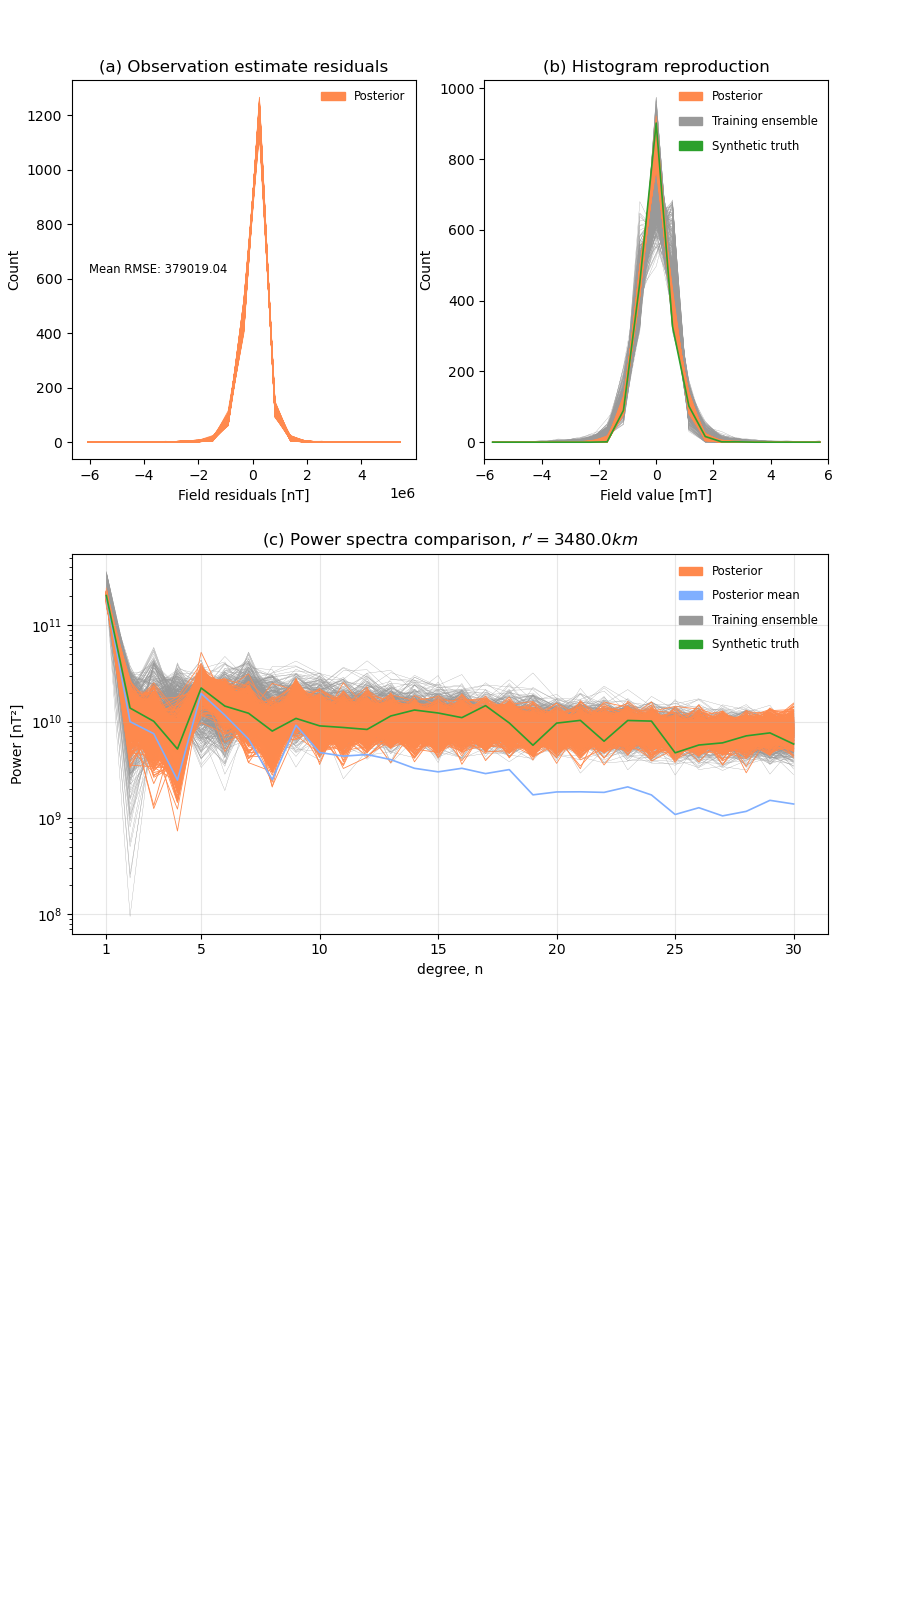

In [12]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)

#truth_obj = s_source

core.m_DSS_res = core.m_DSS - s_source.data.reshape(-1,1)

core.grid_glq(nmax = shc_grid, r_at = core.r_cmb)
#m_mode = m_DSS_mode
mt_util.plot_sdssim_reproduce(core, core.m_DSS_res, m_equiv_lsq = None, truth_obj = s_source,
                              lags_use = 1000, spec_r_at = core.r_cmb, spec_show_differences = False,
                              spec_ti_ens = True, lwidth = 0.6, lwidth_div = 3, lwidth_mult = 2,
                              label_fontsize = "small",
                              res_use = True, sv_use = False, unit_field = "[mT]", hist_ti_ens_limit = [-6,6],
                              unit_transform_n_to_m = True, patch_legend = True, ens_prior = True,
                              model_dict = {}, figsize=(9,16), hist_ti_ens = "all", hist_density = False,
                              hist_bins = 21, res_bins = 21, hist_pos_mean = False,
                              left=0.08, bottom=0.12, right=0.92, top=0.95, wspace = 0.2, hspace=0.25,
                              savefig = False, save_string = "case_core_synthetic_sht_direct", 
                              save_dpi = 100, save_path = "images/")

In [16]:
core.grid_glq(nmax = 400, r_at = core.r_cmb)
#core.grid_glq(nmax = 30, r_at = core.r_cmb)

set_nmax = shc_grid

core.ensemble_B(core.g_spec, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_eqa = core.B_ensemble[:,0,:].copy()
#zs_eqa = core.m_DSS
#core.g_spec_mean = np.mean(core.g_spec,axis=1)
core.ensemble_B(core.g_spec_mean, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_mean_eqa = core.B_ensemble[:,0].copy()
#zs_mean_eqa = np.mean(core.m_DSS,axis=1)

#core.ensemble_B(core.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
core.ensemble_B(s_source.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
prior_eqa = core.B_ensemble[:,0].copy()

#core.ensemble_B(core.g_lsq_equiv, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
#lsq_eqa = core.B_ensemble[:,0].copy()

<IPython.core.display.Javascript object>


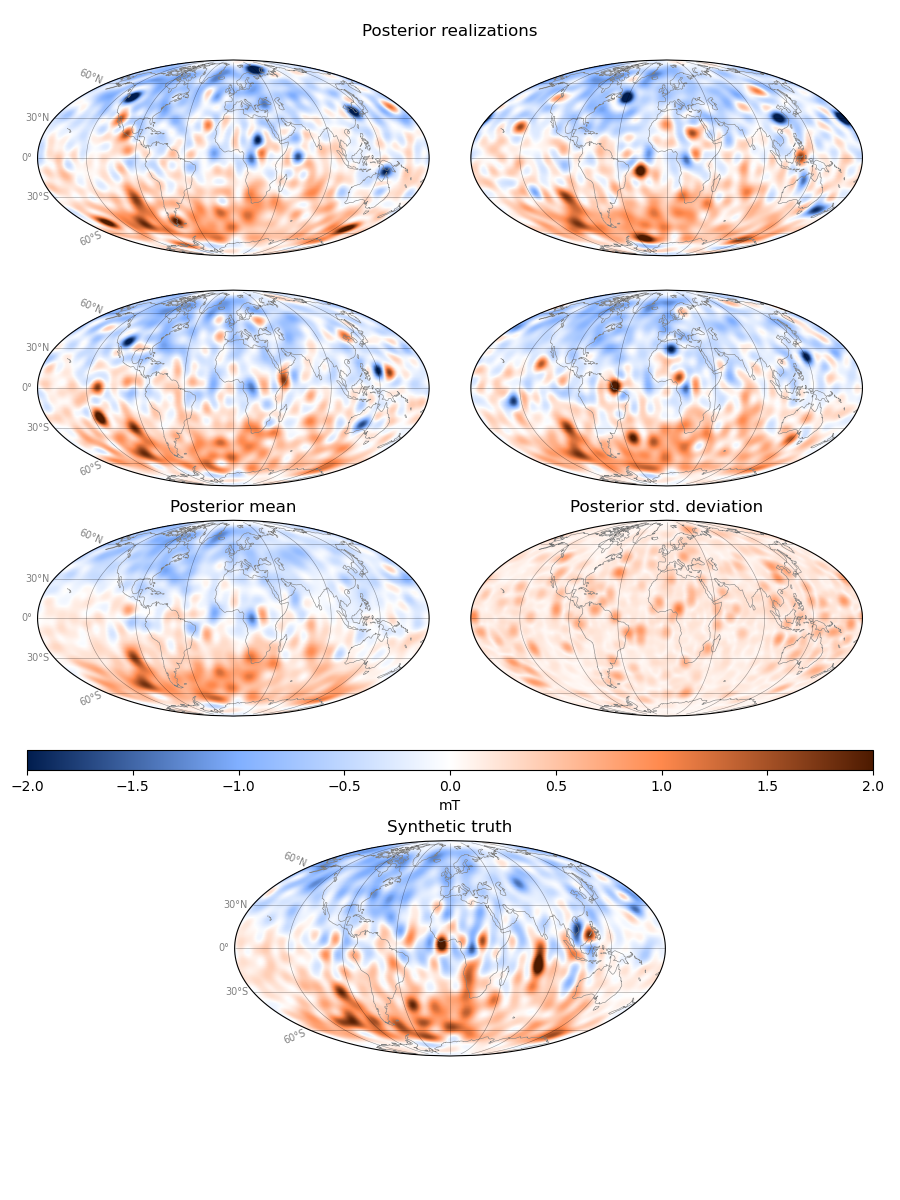

In [17]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)
# ccrs.PlateCarree()
# ccrs.Mollweide()
# ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)

mt_util.plot_ensemble_map_tiles(core.grid_phi, 90-core.grid_theta, zs_eqa, 
                        field_compare = prior_eqa, field_lsq = None, field_mean = zs_mean_eqa,
                        tile_size_row = 3, tile_size_column = 2, 
                        figsize=(9,12), limit_for_SF = 10**6, point_size = 1, cbar_limit = [-2,2],
                        coast_width = 0.4, coast_color = "grey", unit_transform_n_to_m = True,
                        cbar_h = 0.1, cbar_text = "mT", cbar_text_color = "black",
                        left=0.03, bottom=0.12, right=0.97, top=0.95, wspace = 0.05, hspace=0.25, 
                        savefig = False, save_string = "case_core_synthetic_sht", 
                        projection = ccrs.Mollweide(), use_gridlines = True, 
                        gridlines_width = 0.4, gridlines_alpha = 0.4, save_dpi = 100,
                        save_path = "images/")


In [14]:
nb_name = "nb_case_core_synthetic_direct"

In [16]:
print(core)


______current attributes______

a:                       6371.2
r_sat:                   6721.2
r_cmb:                   3480.0
rad:                     0.017453292519943295
mu0:                     1.2566370614359173e-06
comment:                 Synthetic core with tapered ensemble as prior
class_abs_path:          /home/mikotz/spherical_direct_sequential_simulation
N_SH:                    30
N_SH_secondary:          None
sim_type:                core_ens
grid_zero:               (31,), Max/Min: 1.00 / -1.00
grid_w_shtools:          (31,), Max/Min: 0.10 / 0.01
grid_shape:              (2,), Max/Min: 61.00 / 31.00
grid_w:                  (1891,), Max/Min: 0.10 / 0.01
grid_radial:             (1891,), Max/Min: 3480.00 / 3480.00
grid_theta:              (1891,), Max/Min: 175.63 / 4.37
grid_phi:                (1891,), Max/Min: 354.10 / 0.00
grid_N:                  1891
grid_nmax:               30
r_grid:                  3480.0
grid:                    (1891, 2)
sph_d:               

In [18]:
del core.C_ens_tap
del core.m_ens

# SAVE RESULT
print("\nSaving job")
file_pickle = open("{}.obj".format(nb_name), "wb")
pickle.dump(core, file_pickle) #, pickle_protocol=4
file_pickle.close()
print("\nJob saved and finished")


Saving job

Job saved and finished


In [15]:
core.pickle_save_self(nb_name)

AttributeError: G

In [24]:
list_coord = np.array([[0,2], [-30,30], [45,-45], [70,-170]])
list_coord[:,0] = 90 - list_coord[:,0]
list_coord[:,1][list_coord[:,1]<0.0] = 360 + list_coord[:,1][list_coord[:,1]<0.0]

m_coord_sph = np.hstack((90 - core.lat.reshape(-1,1), core.lon.reshape(-1,1)))

idx_min = []
for coord in list_coord:
    idx_min.append(np.sum(np.abs(m_coord_sph - coord),axis=1).argmin())
    
print(idx_min)

m_hists_coord = m_coord_sph[idx_min]

m_hists = core.m_DSS[idx_min,:]

[915, 1225, 480, 215]


In [25]:
left=0.08
bottom=0.12
right=0.92
top=0.95
wspace = 0.2
hspace=0.25

color_rgb_zesty_pos = (1.0,  0.5372549019607843,  0.30196078431372547)
color_rgb_zesty_neg = (0.5019607843137255,  0.6862745098039216,  1.0)

In [ ]:
m_hists_scale = m_hists*10**(-6)

tile_size_row = 2
tile_size_column = 2

label_fontsize = 10

fig = plt.figure(figsize=(9,9)) # Initiate figure with constrained layout
# Generate ratio lists
h_ratio = [1]*tile_size_row
w_ratio = [1]*tile_size_column
gs = fig.add_gridspec(tile_size_row, tile_size_column, height_ratios=h_ratio, width_ratios=w_ratio) # Add x-by-y grid

for i in np.arange(0,list_coord.shape[0]):

    ax = fig.add_subplot(gs[i])
    
    y,binEdges=np.histogram(m_hists_scale[i,:],bins=11,density=True)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])    
    ax.plot(bincenters, y, '-', color = color_rgb_zesty_neg, 
            label='{}'.format(str(np.round(m_hists_coord[i,:],decimals=1))).lstrip('[').rstrip(']'),
            linewidth = 1)

    #ax.set_title('test')
    #ax.annotate("test", (0.05, 0.5), xycoords='axes fraction', va='center', fontsize = label_fontsize)
    ax.set_xlabel("Field value [mT]")
    ax.set_ylabel("PDF")
    ax.legend(loc='best', fontsize = label_fontsize)
    

fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

In [13]:
#core.grid_glq(nmax = 256, r_at = core.r_cmb)
#core.grid_glq(nmax = 120, r_at = core.r_cmb)
core.grid_glq(nmax = 400, r_at = core.r_cmb)

set_nmax = shc_grid

core.ensemble_B(core.g_spec, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_eqa = core.B_ensemble[:,0,:].copy()

#core.g_spec_mean = np.mean(core.g_spec,axis=1)
core.ensemble_B(core.g_spec_mean, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_mean_eqa = core.B_ensemble[:,0].copy()

#core.ensemble_B(core.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
core.ensemble_B(s_sat.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
prior_eqa = core.B_ensemble[:,0].copy()

#core.ensemble_B(core.g_lsq_equiv, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
#lsq_eqa = core.B_ensemble[:,0].copy()

In [ ]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)
# ccrs.PlateCarree()
# ccrs.Mollweide()
# ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)

mt_util.plot_ensemble_map_tiles(core.grid_phi, 90-core.grid_theta, zs_eqa, 
                        field_compare = prior_eqa, field_lsq = None, field_mean = zs_mean_eqa,
                        tile_size_row = 3, tile_size_column = 2, 
                        figsize=(9,12), limit_for_SF = 10**6, point_size = 0.1, cbar_mm_factor = 1, cbar_limit = [-1.6,1.6],
                        coast_width = 0.4, coast_color = "grey", unit_transform_n_to_m = True,
                        cbar_h = 0.1, cbar_text = "mT", cbar_text_color = "black",
                        left=0.03, bottom=0.12, right=0.97, top=0.95, wspace = 0.05, hspace=0.25, 
                        savefig = False, save_string = "case_core_synthetic", 
                        projection = ccrs.Mollweide(), use_gridlines = True, 
                        gridlines_width = 0.4, gridlines_alpha = 0.4, save_dpi = 100)
